In [7]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler, LabelEncoder


## Load Dataset

In [50]:
df = pd.read_csv("../datasets/adult.csv")
# data = data.sample(frac=0.1, random_state=1)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [51]:
df.shape

(48842, 15)

Preprocess

In [89]:
# df = df.sample(n=500)
le = LabelEncoder()

adult_columns = ["workclass", 
           "education", 
           "marital-status", 
           "occupation", 
           "relationship", 
           "race", 
           "gender", 
           "native-country", 
           "income"]
# adults_drop = ["gender", "index"]
adults_drop = ["gender", "income"]

for col in adult_columns:
    df[col] = le.fit_transform(df[col])

print(len(df[df["gender"] == 0]) / len(df))

y = df["gender"]
X = df.drop(columns=["gender"])
# y = df["income"]

X.head()

0.33151795585766347


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,30,39,0


In [90]:
X = StandardScaler().fit_transform(X)
X.shape, y.shape

((48842, 14), (48842,))

## K Means

In [38]:
from sklearn.cluster import KMeans

Generate Report

In [40]:
# X = points[["gre", "gpa"]].to_numpy()

result = {
    "k": [],
    "ratio": [],
    "size": [],
    "cluster_id": []
}

for k in [2, 3, 4, 5, 6, 7]:
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(X)
    colors = kmeans.predict(X)
    clusters = pd.DataFrame(X)
    colors = pd.DataFrame(colors)
    clusters["colors"] = colors
    clusters["gender"] = y
    
    for c in clusters["colors"].unique():
        tmp = clusters[clusters["colors"] == c]

        result["cluster_id"].append(c)
        result["k"].append(k)
        result["ratio"].append(tmp["gender"].value_counts()[0] / len(tmp))
        result["size"].append(len(tmp))
result = pd.DataFrame(result)

In [41]:
result

,k,ratio,size,cluster_id
0,2,0.333775,45252,0
1,2,0.303064,3590,1
2,3,0.530636,19552,1
3,3,0.235989,17772,0
4,3,0.140910,11518,2
5,4,0.529915,19522,2
6,4,0.236066,17745,0
7,4,0.143147,11331,1
8,4,0.147541,244,3
9,5,0.300979,5718,1


In [42]:
# result.to_csv("./reports/adults_clustering.csv", index=0)
result = pd.read_csv("./reports/adults_clustering.csv")
result.head()

,k,ratio,size,cluster_id
0,2,0.333775,45252,0
1,2,0.303064,3590,1
2,3,0.530636,19552,1
3,3,0.235989,17772,0
4,3,0.140910,11518,2


In [43]:
result.groupby("k").max()

,ratio,size,cluster_id
k,,,
2,0.333775,45252,1
3,0.530636,19552,2
4,0.529915,19522,3
5,0.529023,14678,4
6,0.527644,13041,5
7,0.844642,13670,6


In [44]:
result[result["k"] == 5].sort_values("cluster_id")

,k,ratio,size,cluster_id
11,5,0.137051,10850,0
9,5,0.300979,5718,1
13,5,0.529023,14678,2
12,5,0.479504,3952,3
10,5,0.243624,13644,4


# AffinityPropagation

In [77]:
from sklearn.cluster import AffinityPropagation

In [91]:
# X = points[["gre", "gpa"]].to_numpy()
ind = np.random.choice(X.shape[0], size=4000, replace=False)
X = X[ind]
y = y[ind]

# Step 2: Apply Affinity Propagation
affinity_propagation = AffinityPropagation(preference=-300)
labels = affinity_propagation.fit_predict(X)
cluster_centers = affinity_propagation.cluster_centers_

# Step 3: Visualize Results
unique_labels = np.unique(labels)
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
for label in unique_labels:
    # cluster_points = X[labels == label]
    # plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label}", s=50)
    print(label)

# Mark the cluster centers
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label="Cluster Centers")

# plt.title("Affinity Propagation Clustering")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.legend()
# plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


<Figure size 800x600 with 0 Axes>

In [97]:
clusters = pd.DataFrame(X)
colors = pd.DataFrame(labels)
clusters["colors"] = colors
clusters["gender"] = y
ratios = []
sizes = []
for c in clusters["colors"].unique():
    tmp = clusters[clusters["colors"] == c]
    # print(f"cluter: {c}, \nfemale: {tmp['gender'].value_counts()}\n")
    # if len(tmp["gender"].value_counts()) > 1:
    
    if (len(tmp["gender"].value_counts()) < 2):
        continue
    ratios.append(tmp["gender"].value_counts()[0] / len(tmp["gender"]))
    sizes.append(len(tmp))
    print(f"cluster: {c}", "female/male: ", tmp["gender"].value_counts()[0] / tmp["gender"].value_counts()[1], "size: ", len(tmp))

cluster: 10 female/male:  0.875 size:  201
cluster: 24 female/male:  0.4 size:  270
cluster: 12 female/male:  0.3333333333333333 size:  234
cluster: 27 female/male:  0.6666666666666666 size:  194
cluster: 11 female/male:  0.28 size:  335
cluster: 13 female/male:  0.6 size:  239
cluster: 9 female/male:  0.23076923076923078 size:  164
cluster: 14 female/male:  0.2 size:  97
cluster: 20 female/male:  0.3333333333333333 size:  98
cluster: 4 female/male:  1.0 size:  81
cluster: 0 female/male:  0.5714285714285714 size:  185
cluster: 3 female/male:  0.45454545454545453 size:  164
cluster: 5 female/male:  0.6 size:  93
cluster: 25 female/male:  0.3333333333333333 size:  77
cluster: 2 female/male:  0.5 size:  84
cluster: 8 female/male:  0.1111111111111111 size:  105
cluster: 21 female/male:  1.4444444444444444 size:  230
cluster: 1 female/male:  0.3333333333333333 size:  140
cluster: 23 female/male:  0.6 size:  143
cluster: 15 female/male:  0.7142857142857143 size:  204
cluster: 17 female/male:

/tmp/ipykernel_3185097/99673399.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(clusters, rotation=45, fontsize=14)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


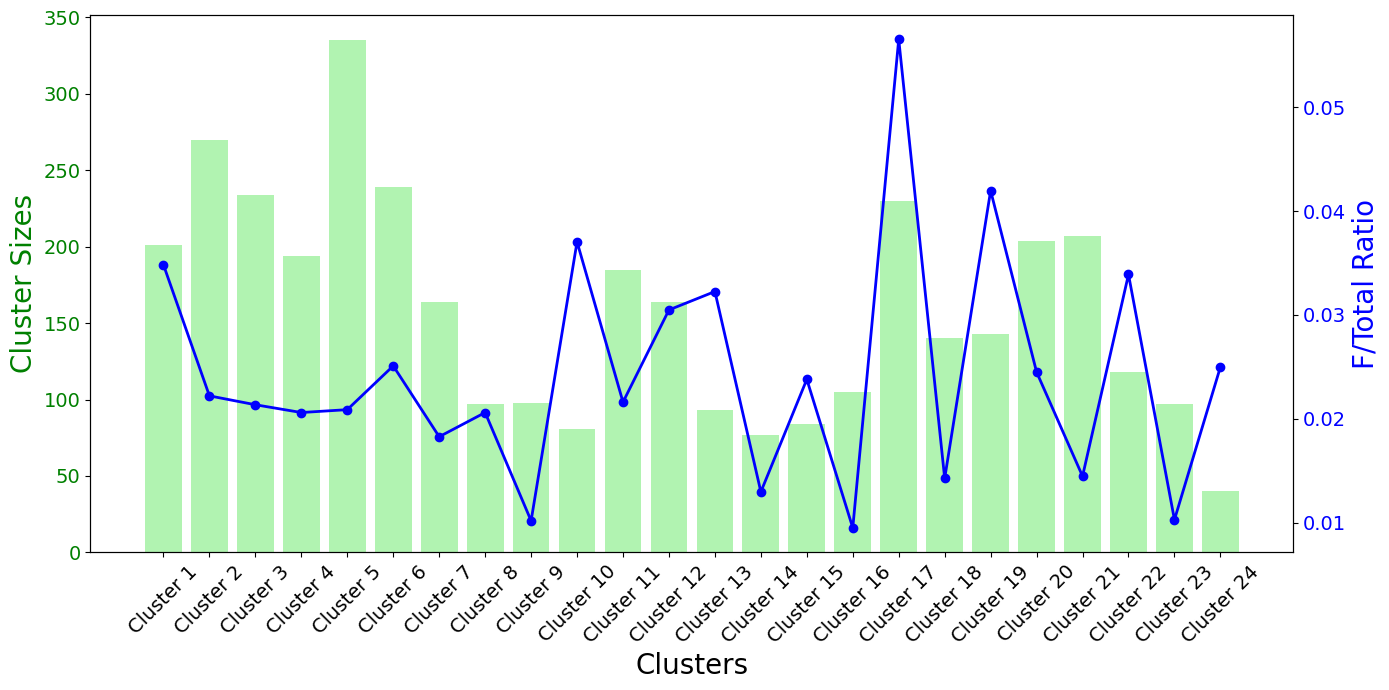

In [106]:
import matplotlib.pyplot as plt

clusters = [f"Cluster {i}" for i in range(1, len(ratios) + 1)]
associated_numbers = ratios
cluster_sizes = sizes

fig, ax1 = plt.subplots(figsize=(14, 7))
# Bar chart for cluster sizes
ax1.bar(clusters, cluster_sizes, color="lightgreen", alpha=0.7, label="Cluster Sizes")
ax1.set_ylabel("Cluster Sizes", color="green", fontsize=20)
ax1.tick_params(axis="y", labelcolor="green", labelsize=14)
ax1.set_xlabel("Clusters", fontsize=20)
ax1.set_xticklabels(clusters, rotation=45, fontsize=14)

# Tighten the y-axis for cluster sizes
# ax1.set_ylim(min(cluster_sizes) - 50, max(cluster_sizes) + 50)

# Line plot for associated numbers on secondary axis
ax2 = ax1.twinx()
ax2.plot(clusters, associated_numbers, color="blue", marker="o", label="Associated Numbers", linewidth=2)
ax2.set_ylabel("F/Total Ratio", color="blue", fontsize=20)
ax2.tick_params(axis="y", labelcolor="blue", labelsize=14)

# Add a title
# plt.title("Cluster Sizes and Associated Numbers with Tightened Y-Axis")
fig.tight_layout()
plt.savefig("Affinity_Adults.eps", format="eps")
plt.show()